## Face Detection

Latar belakang:
test test test test

In [113]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [114]:
datagen = ImageDataGenerator(
    rescale=1./255,
)

### Age

Link to the dataset: https://www.kaggle.com/datasets/mariafrenti/age-prediction?select=age_prediction_up

In [115]:
age_generator = datagen.flow_from_directory(
    'data/data face/age',
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical'
)

Found 227237 images belonging to 20 classes.


In [116]:
class_to_age = {i: f'{5*(i-1)+1}-{5*i}' for i in range(1, 21)}
class_indices = age_generator.class_indices
classes = age_generator.classes
class_counts = {int(class_name): sum(classes == class_index) for class_name, class_index in class_indices.items()}
class_counts = dict(sorted(class_counts.items()))
age_counts = {class_to_age[int(class_name)]: count for class_name, count in class_counts.items()}
print(age_counts)

{'1-5': 2314, '6-10': 1517, '11-15': 4014, '16-20': 11613, '21-25': 26883, '26-30': 34537, '31-35': 35571, '36-40': 31221, '41-45': 24408, '46-50': 17516, '51-55': 12220, '56-60': 8830, '61-65': 6295, '66-70': 4188, '71-75': 2627, '76-80': 1746, '81-85': 1007, '86-90': 484, '91-95': 177, '96-100': 69}


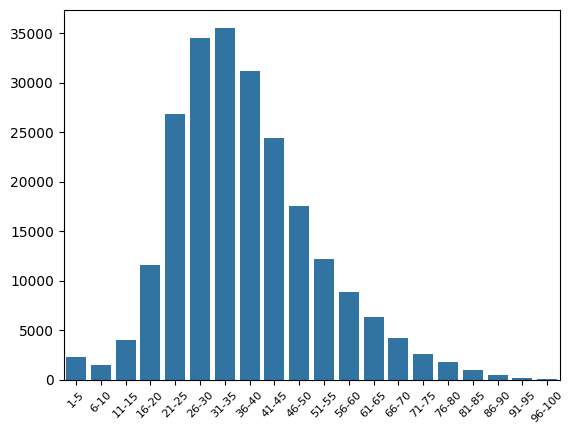

In [117]:
sns.barplot(x=list(age_counts.keys()), y=list(age_counts.values()))
plt.xticks(rotation=45,fontsize=8)
plt.show()

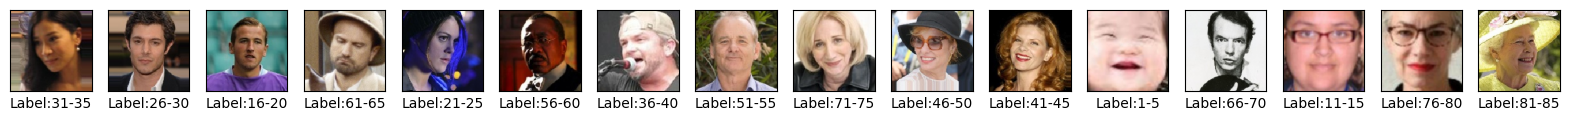

In [118]:
x_train, y_train = age_generator.next()
y_train = np.argmax(y_train, axis=1)+1
class_indices = {}
for i, y in enumerate(y_train):
    if y not in class_indices:
        class_indices[y] = i
class_age = [class_to_age[int(y)] for y in class_indices.keys()]

plt.figure(figsize=(20,20))
for i, (class_id, image_index) in enumerate(class_indices.items()):
    plt.subplot(1,len(class_indices),i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[image_index], cmap='gray')
    plt.xlabel(f"Label:{class_age[i]}")
plt.show()

### Expression

Link dataset:
- https://www.kaggle.com/datasets/mahmoudima/mma-facial-expression
- https://www.kaggle.com/datasets/shawon10/ckplus

In [119]:
expression_generator = datagen.flow_from_directory(
    'data/data face/expression',
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical'
)

Found 128607 images belonging to 7 classes.


In [120]:
class_to_expression = {i: expression for i, expression in enumerate(expression_generator.class_indices)}
class_indices = expression_generator.class_indices
classes = expression_generator.classes
class_counts = {class_name: sum(classes == class_index) for class_name, class_index in class_indices.items()}
print(class_counts)

{'angry': 8759, 'disgust': 4719, 'fear': 6284, 'happy': 39733, 'neutral': 41081, 'sad': 16720, 'surprise': 11311}


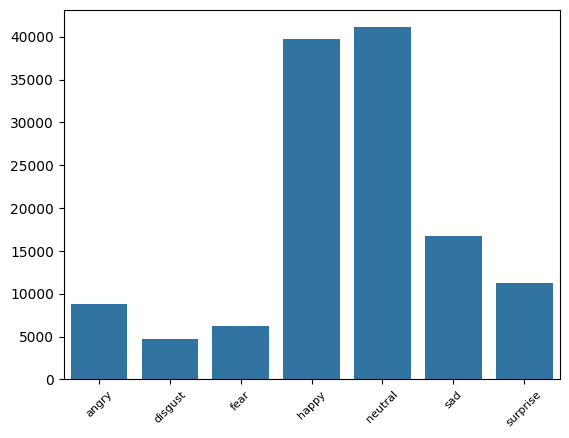

In [121]:
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=45,fontsize=8)
plt.show()

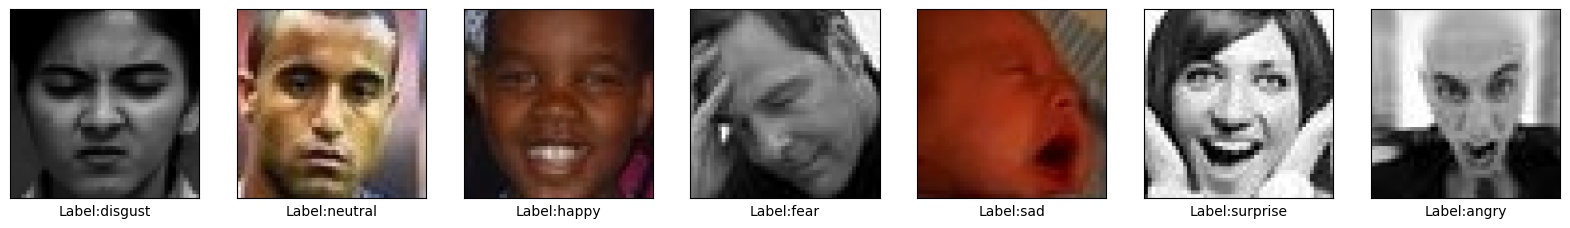

In [122]:
x_train, y_train = expression_generator.next()
y_train = np.argmax(y_train, axis=1)
class_indices = {}

for i, y in enumerate(y_train):
    if y not in class_indices:
        class_indices[y] = i
class_expression = [class_to_expression[int(expression)] for expression in class_indices.keys()]

plt.figure(figsize=(20,10))
for i, (class_id, image_index) in enumerate(class_indices.items()):
    plt.subplot(1,len(class_indices),i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[image_index], cmap='gray')
    plt.xlabel(f"Label:{class_expression[i]}")
plt.show()

### Gender

Link dataset:
- https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset
- https://www.kaggle.com/datasets/maciejgronczynski/biggest-genderface-recognition-dataset

In [123]:
gender_generator = datagen.flow_from_directory(
    'data/data face/gender',
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
)

Found 85825 images belonging to 2 classes.


In [124]:
class_indices = gender_generator.class_indices
classes = gender_generator.classes
class_counts = {class_name: sum(classes == class_index) for class_name, class_index in class_indices.items()}
print(class_counts)

{'female': 38573, 'male': 47252}


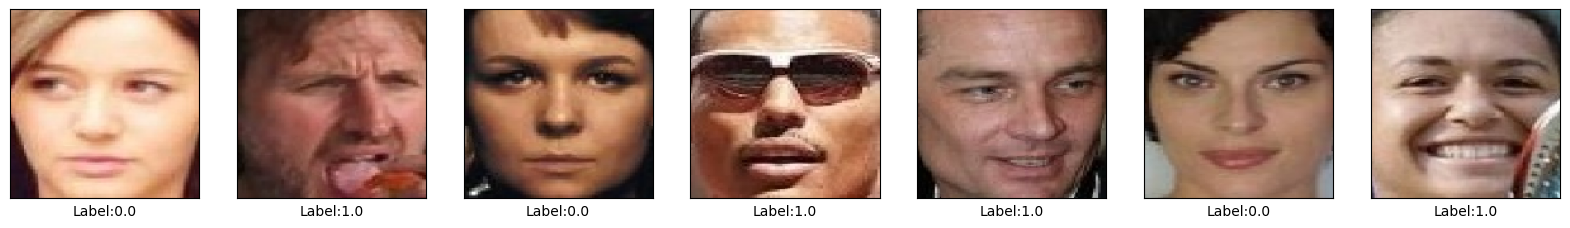

In [125]:
x_train, y_train = gender_generator.next()

plt.figure(figsize=(20,10))
for i in range(7):
    plt.subplot(1,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(f"Label:{y_train[i]}")
plt.show()